In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lzma
import pickle

from matplotlib.lines import Line2D

In [2]:
load_Dir = "../Data/"

In [3]:
file_name = "DF_20250620-lam_rho_3.xz"
with lzma.open(load_Dir + file_name, "rb") as f:
    data_frame = pickle.load(f)
data_frame[r"$\rho$"] = data_frame["M"]
data_frame[r"$\delta$"] = data_frame["S"]

In [5]:
data_frame[r"$\alpha$"] = data_frame[r"$N$"]/data_frame[r"$M$"]

In [6]:
sns.set_theme(style="whitegrid",font_scale=1.3)

In [7]:
data_frame_rho = data_frame[(data_frame[r"$\lambda$"]==0.1) | (data_frame[r"$\lambda$"]==0.2) |  (data_frame[r"$\lambda$"]==0.4) |  (data_frame[r"$\lambda$"]==0.8) |  (data_frame[r"$\lambda$"]==1) ] 

In [8]:
#import MO_tab from MO.csv
MO_tab = pd.read_csv(load_Dir + "MO.csv")
rho_tab = sorted(data_frame_rho[r"$\rho$"].unique())

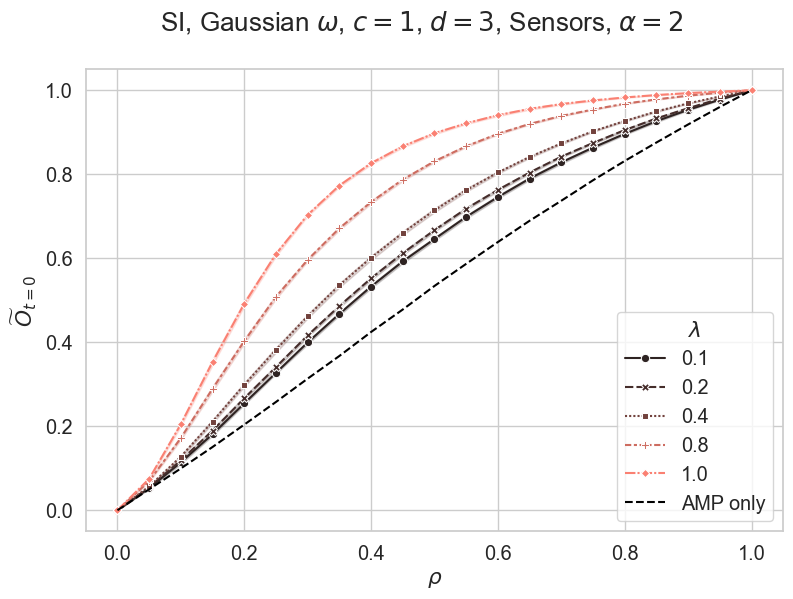

In [10]:
#df_sens = data_frame.copy()

fig,ax = plt.subplots(1, 1, figsize=(9,6))
fig.suptitle(r"SI, Gaussian $\omega$, $c=1$, $d=3$, Sensors, $\alpha=2$ ")
sns.lineplot(data=data_frame_rho, x=r"$\rho$", y=r"$\widetilde{O}_{t=0}$", hue=r"$\lambda$", markers=True, errorbar=("ci", 99), style=r"$\lambda$", palette="dark:salmon", legend="full")
ax.plot(rho_tab, MO_tab, color="black", linestyle="--", label="AMP only")
#ax.set_xscale("log")
#ax.set_xticks([1,5,10,20,50])
#ax.set_xticklabels([1,5,10,20,50])
#ax.set_yscale("log")
# put the AMP only line in the legend along with seaborn lines
handles, labels = ax.get_legend_handles_labels()
line = Line2D([0], [0], label='AMP only', color='black', linestyle='--')
ax.legend(handles=handles, labels=labels, title=r"$\lambda$", loc='lower right')
#fig.savefig(f"./figures/Plot_lambda_AMP.pdf")

#### $\lambda$

In [11]:
file_name = "DF_lambda_final.xz"
with lzma.open(load_Dir + file_name, "rb") as f:
    data_frame = pickle.load(f)
data_frame[r"$\rho$"] = data_frame["M"]
data_frame[r"$\delta$"] = data_frame["S"]

In [12]:
data_frame[r"$\alpha$"] = np.int32(data_frame[r"$N$"]/data_frame[r"$M$"])

In [13]:
data_frame_lam = data_frame[(data_frame[r"$\alpha$"]==1) | (data_frame[r"$\alpha$"]==2) |  (data_frame[r"$\alpha$"]==5) |  (data_frame[r"$\alpha$"]==10) |  (data_frame[r"$\alpha$"]==20) | (data_frame[r"$\alpha$"]==40) ]

<Axes: xlabel='$\\lambda$', ylabel='$\\widetilde{O}_{t=0}$'>

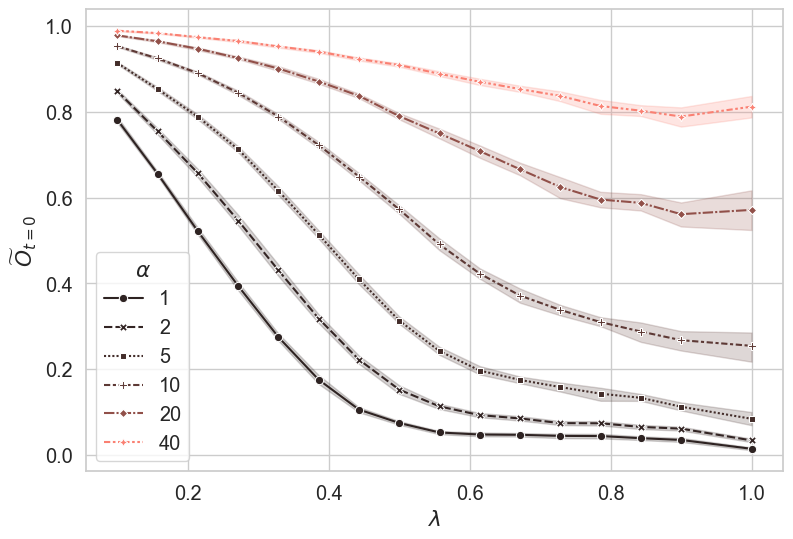

In [14]:
#df_sens = data_frame.copy()

fig,ax = plt.subplots(1, 1, figsize=(9,6))
sns.lineplot(data=data_frame_lam, x=r"$\lambda$", y=r"$\widetilde{O}_{t=0}$", hue=r"$\alpha$", markers=True, errorbar=("ci", 99), style=r"$\alpha$", palette="dark:salmon", legend="full")
#ax.set_xscale("log")
#ax.set_xticks([1,5,10,20,50])
#ax.set_xticklabels([1,5,10,20,50])
#ax.set_yscale("log")
# put the AMP only line in the legend along with seaborn lines
#ax.legend(handles=handles, labels=labels, title=r"$\lambda$", loc='lower right')
#fig.savefig(f"./figures/Plot_lambda_AMP.pdf")

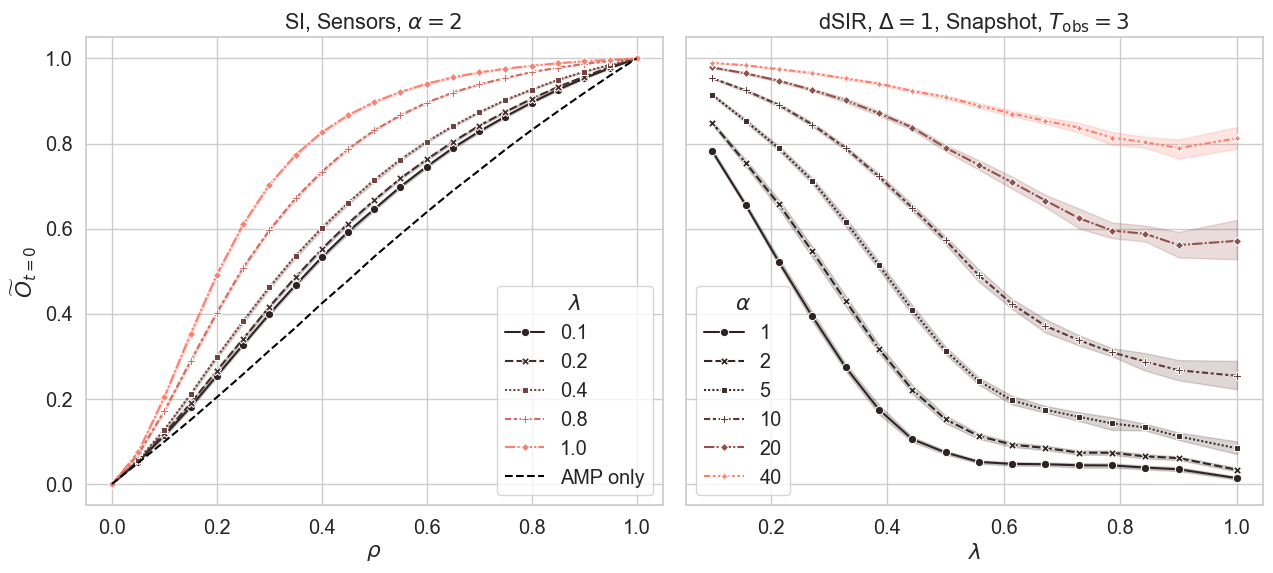

In [16]:
#df_sens = data_frame.copy()

fig,axs = plt.subplots(1, 2, figsize=(13,6), sharey=True)
#fig.suptitle(r"SI, Gaussian $\omega$, $c=1$, $d=3$, Sensors, $\alpha=2$ ")
ax = axs[0]
ax.title.set_text(r"SI, Sensors, $\alpha=2$ ")
sns.lineplot(data=data_frame_rho, x=r"$\rho$", y=r"$\widetilde{O}_{t=0}$", hue=r"$\lambda$", markers=True, errorbar=("ci", 99), style=r"$\lambda$", palette="dark:salmon", legend="full", ax=ax)
ax.plot(rho_tab, MO_tab, color="black", linestyle="--", label="AMP only")
#ax.set_xscale("log")
#ax.set_xticks([1,5,10,20,50])
#ax.set_xticklabels([1,5,10,20,50])
#ax.set_yscale("log")
# put the AMP only line in the legend along with seaborn lines
handles, labels = ax.get_legend_handles_labels()
line = Line2D([0], [0], label='AMP only', color='black', linestyle='--')
ax.legend(handles=handles, labels=labels, title=r"$\lambda$", loc='lower right')
ax = axs[1]
ax.title.set_text(r"dSIR, $\Delta=1$, Snapshot, $T_{\rm obs}=3$ ")
sns.lineplot(data=data_frame_lam, x=r"$\lambda$", y=r"$\widetilde{O}_{t=0}$", hue=r"$\alpha$", markers=True, errorbar=("ci", 99), style=r"$\alpha$", palette="dark:salmon", legend="full")

#ax.set_xscale("log")
#ax.set_xticks([1,5,10,20,50])
#ax.set_xticklabels([1,5,10,20,50])
#ax.set_yscale("log")
# put the AMP only line in the legend along with seaborn lines

fig.tight_layout()
fig.savefig(f"../Plots/Figure2.pdf")